# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Programming/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


*На Кагле по гистограммам уже было видно, что признаки распределены нормально.*

*Столбец со времнем бесполезен, можно удалить.*

In [ ]:
data = data.drop(columns=['Time'])
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


*Посмотрим, сколько строк со значением Class = 1:*

In [ ]:
data[data['Class'] == 1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


*Классы совсем чуть-чуть несбалансированы (0.17% класса 1 от общего числа транзакций), поэтому нет смысла смотреть на accuracy*

In [ ]:
X = data.drop(columns='Class')
y = data['Class']

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
log_reg = LogisticRegression(max_iter=500)
knn = KNeighborsClassifier()
gnb = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2077)

In [ ]:
y_pred_const = np.zeros(len(y_test))
y_pred_const

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
def print_metrics(y_test, y_pred, y_pred_proba):
    print('accuracy =', accuracy_score(y_test, y_pred))
    print('precision =', precision_score(y_test, y_pred))
    print('recall =', recall_score(y_test, y_pred))
    print('F1 =', f1_score(y_test, y_pred))
    print('roc_auc_score =', roc_auc_score(y_test, y_pred_proba))
    plt.figure(figsize=(7, 7))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, 'b', linewidth=3)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0, 0], [0, 1], 'k')
    plt.plot([1, 1], [0, 1], 'k')
    plt.plot([0, 1], [0, 0], 'k')
    plt.plot([0, 1], [1, 1], 'k')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.axis('equal')
    plt.title('ROC curve')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy = 0.9991924440855307
precision = 0.8818181818181818
recall = 0.6339869281045751
F1 = 0.7376425855513308
roc_auc_score = 0.9741901716328067


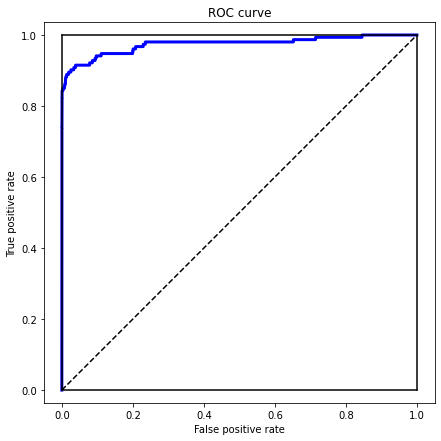

In [ ]:
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_pred_proba_log = log_reg.predict_proba(X_test)[:, 1]
print_metrics(y_test, y_pred_log, y_pred_proba_log)

*Регрессия показывает неплохой recall, достаточно высокий precision*

accuracy = 0.9991924440855307
precision = 0.9375
recall = 0.5882352941176471
F1 = 0.7228915662650602
roc_auc_score = 0.8723808505697976


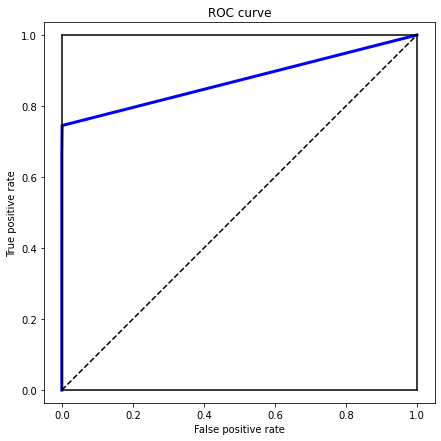

In [ ]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
print_metrics(y_test, y_pred_knn, y_pred_proba_knn)

*Низкий recall и высокий precision*

accuracy = 0.9778682864599791
precision = 0.06243705941591138
recall = 0.8104575163398693
F1 = 0.11594202898550725
roc_auc_score = 0.9683795462922731


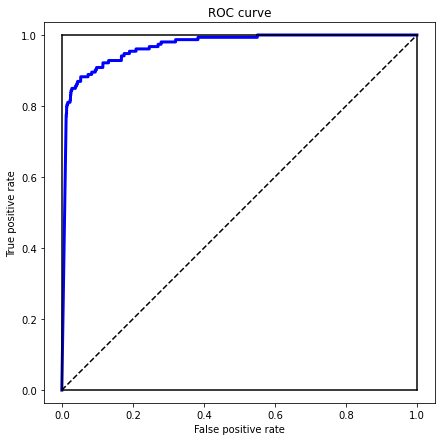

In [ ]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
y_pred_proba_gnb = gnb.predict_proba(X_test)[:, 1]
print_metrics(y_test, y_pred_gnb, y_pred_proba_gnb)

*Очень низкий precision, то есть модель добавила много лишних объектов в класс 1 (много false positive).*

accuracy = 0.9982093325374811
precision = 0.0
recall = 0.0
F1 = 0.0
roc_auc_score = 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


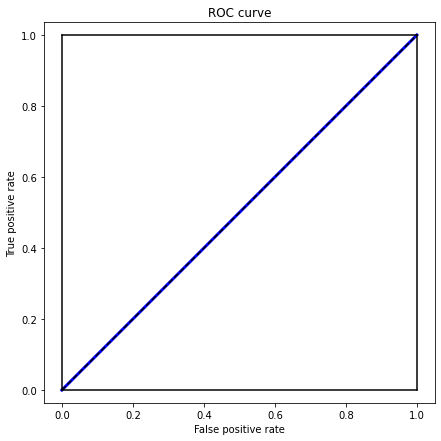

In [ ]:
y_pred_const = np.zeros(len(y_test))
y_pred_proba_const = np.zeros(len(y_test))
print_metrics(y_test, y_pred_const, y_pred_proba_const)

*Зато accuracy 0.998, можно похвастаться...*

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

*Я выберу метрику recall, так как в данной задаче выжно определить и найти как можно больше мошенников и не банить обычных пользователей. Эта метрика как раз позволит понять, всех ли мошенников находит модель.*

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import cross_val_score

#### LogisticRegression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



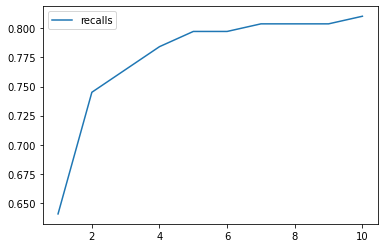

In [ ]:
recalls = []

weights = range(1, 11)
for i in weights:
  log_reg_w = LogisticRegression(class_weight={0:1, 1:i}, max_iter=1000)
  log_reg_w.fit(X_train, y_train)
  y_pred = log_reg_w.predict(X_test)
  recalls.append(recall_score(y_test, y_pred))

plt.plot(weights, recalls)
plt.legend(['recalls'])

*Можно подобрать оптимальный вес для класса 1, но поиск займет слишком много времни, поэтому можно взять просто максимально найденный (10)*

*При подборе параметров для логрега использовал именно `lbfgs`, так как `liblinear` рекомендуется для небольших датасетов, а `saga` для сбалансированных (на нем у меня получался recall меньше 0.1)*

In [ ]:
C_labels = []
l_labels = []
recalls = []
for i in ['none', 'l2']:
    for j in [1.0, 10.0, 100.0]:
        l_labels.append(i)
        C_labels.append(j)
        log_reg_w = LogisticRegression(penalty=i, C=j, max_iter=500, solver='lbfgs')
        log_reg_w.fit(X_train, y_train)
        y_pred = log_reg_w.predict(X_test)
        recalls.append(recall_score(y_test, y_pred))
    # weights = range(12, 15)
    # for j in weights:
    #     log_reg_w = LogisticRegression(class_weight={0:1, 1:j}, max_iter=1000)
    #     log_reg_w.fit(X_train, y_train)
    #     y_pred = log_reg_w.predict(X_test)
    #     recalls.append(recall_score(y_test, y_pred))

res = {
        'recalls': recalls,
        'penalty': l_labels,
        'C': C_labels
    }
# plt.plot(weights, recalls)
# plt.legend(['recalls'])
print(res)
fig = px.scatter(res, x='C', y='recalls', color='penalty', title='LogReg', trendline='lowess')
fig.update_layout(yaxis_range=[0.5 ,1])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for al

{'recalls': [0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6339869281045751, 0.6339869281045751, 0.6470588235294118], 'penalty': ['none', 'none', 'none', 'l2', 'l2', 'l2'], 'C': [1.0, 10.0, 100.0, 1.0, 10.0, 100.0]}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



*recall максимальный при l2-регуляризации и `C=100`. Но вырос он немного.*

**Изменение `C` без регуляризации (`none`) никак не влияет на результаты*

In [ ]:
C_labels = []
l_labels = []
scores = []
for i in ['none', 'l2']:
    for j in [1.0, 10.0, 100.0]:
        l_labels.append(i)
        C_labels.append(j)
        log_reg_w = LogisticRegression(penalty=i, C=j, max_iter=500, solver='lbfgs')
        log_reg_w.fit(X_train, y_train)
        y_pred = log_reg_w.predict(X_test)
        scores.append(cross_val_score(LogisticRegression(max_iter=500, penalty=i, C=j), X, y, scoring='recall').mean())
res = {
        'scores': scores,
        'penalty': l_labels,
        'C': C_labels
    }

print(res)
fig = px.scatter(res, x='C', y='scores', color='penalty', title='LogReg', trendline='lowess')
fig.update_layout(yaxis_range=[0.5 ,1])
fig.show()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

{'scores': [0.5951556380127809, 0.5951556380127809, 0.5951556380127809, 0.6012368583797155, 0.597175840032983, 0.5931354359925789], 'penalty': ['none', 'none', 'none', 'l2', 'l2', 'l2'], 'C': [1.0, 10.0, 100.0, 1.0, 10.0, 100.0]}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



*На кросс-валидации максимальный скор показывает `l2` с `C=1`, теперь добавим к этому оптимальный вес класса*

In [ ]:
log_reg_opt = LogisticRegression(class_weight={0:1, 1:10}, penalty='l2', C=1.0, max_iter=1000, solver='lbfgs')
log_reg_opt.fit(X_train, y_train)
y_pred = log_reg_opt.predict(X_test)
recall_score(y_test, y_pred)

0.8104575163398693

*Сравним скор на кросс-валидации у обычной и оптимизированной модели*

In [ ]:
cross_val_score(LogisticRegression(max_iter=500), X, y, scoring='recall').mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

0.6012368583797155

In [ ]:
cross_val_score(LogisticRegression(class_weight={0:1, 1:10}, penalty='l2', C=1.0, max_iter=1000, solver='lbfgs'), X, y, scoring='recall').mean()

0.7945990517419089

accuracy = 0.9992392589211521
precision = 0.775
recall = 0.8104575163398693
F1 = 0.792332268370607
roc_auc_score = 0.9825159375510082


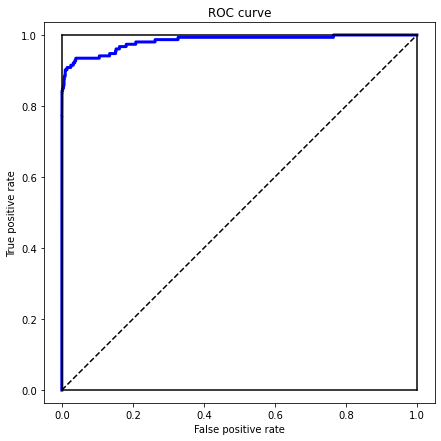

In [ ]:
log_reg_opt = LogisticRegression(class_weight={0:1, 1:10}, penalty='l2', C=1.0, max_iter=1000, solver='lbfgs')
log_reg_opt.fit(X_train, y_train)
y_pred_log_opt = log_reg_opt.predict(X_test)
y_pred_proba_log_opt = log_reg_opt.predict_proba(X_test)[:, 1]
print_metrics(y_test, y_pred_log_opt, y_pred_proba_log_opt)

*Хоть precision и немного упал, но recall и F1 выросли*

#### KNN

*Для KNN переберем количество соседей и методы определения весов. Не использую кросс-валидацию, потому что очень долго работает*

In [ ]:
weights_labels = []
nn_labels = []
recalls = []
for i in ['uniform', 'distance']:
    for j in [3, 5, 10]:
        weights_labels.append(i)
        nn_labels.append(j)
        knn_w = KNeighborsClassifier(n_neighbors=j, weights=i)
        knn_w.fit(X_train, y_train)
        y_pred = knn_w.predict(X_test)
        recalls.append(recall_score(y_test, y_pred))

res = {
        'recalls': recalls,
        'weights': weights_labels,
        'n_neighbors': nn_labels
    }

print(res)
fig = px.scatter(res, x='n_neighbors', y='recalls', color='weights', title='LogReg', trendline='lowess')
fig.update_layout(yaxis_range=[0.5, 1])
fig.show()

{'recalls': [0.6339869281045751, 0.5882352941176471, 0.5294117647058824, 0.6405228758169934, 0.6013071895424836, 0.5686274509803921], 'weights': ['uniform', 'uniform', 'uniform', 'distance', 'distance', 'distance'], 'n_neighbors': [3, 5, 10, 3, 5, 10]}


*Оптимальные параметры: `distance` и количество соседей равное трем*

*Теперь попробуем перебрать параметр p для метрики Minkowski*

In [ ]:
p_labels = []
recalls = []
for i in [1, 2]:
        p_labels.append(i)
        knn_w = KNeighborsClassifier(n_neighbors=3, weights='distance', p=i)
        knn_w.fit(X_train, y_train)
        y_pred = knn_w.predict(X_test)
        recalls.append(recall_score(y_test, y_pred))

res = {
        'recalls': recalls,
        'p_labels': p_labels
    }

print(res)

{'recalls': [0.6666666666666666, 0.6405228758169934], 'p_labels': [1, 2]}


*И посмотрим на итоговые метрики при оптимальных параметрах*

accuracy = 0.9993328885923949
precision = 0.9444444444444444
recall = 0.6666666666666666
F1 = 0.7816091954022987
roc_auc_score = 0.8888071224894382


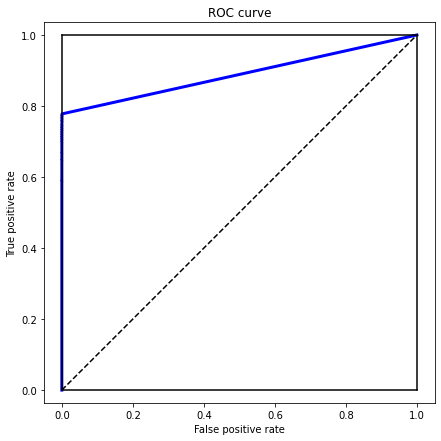

In [ ]:
knn_opt = KNeighborsClassifier(n_neighbors=3, weights='distance', p=1)
knn_opt.fit(X_train, y_train)
y_pred_knn_opt = knn_opt.predict(X_test)
y_pred_proba_knn_opt = knn_opt.predict_proba(X_test)[:, 1]
print_metrics(y_test, y_pred_knn_opt, y_pred_proba_knn_opt)

*Все метрики стали чуть лучше*

In [ ]:
smoothings = []
recalls = []
f1s = []
for i in np.arange(0.0001, 0.001, 0.0001):
        smoothings.append(i)
        gnb_p = GaussianNB(var_smoothing=i)
        gnb_p.fit(X_train, y_train)
        y_pred = gnb_p.predict(X_test)
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))

res = {
    'recalls': recalls,
    'f1': f1s,
    'var_smoothing': smoothings
    }

print(res)
fig = px.scatter(res, x='var_smoothing', y=['recalls', 'f1'], title='GaussianNB', trendline='lowess')
fig.update_layout(yaxis_range=[0, 1])
fig.show()

{'recalls': [0.477124183006536, 0.35294117647058826, 0.28104575163398693, 0.24836601307189543, 0.20915032679738563, 0.20261437908496732, 0.20261437908496732, 0.20261437908496732, 0.20261437908496732], 'f1': [0.31947483588621445, 0.3282674772036474, 0.3173431734317343, 0.31020408163265306, 0.27467811158798283, 0.27678571428571425, 0.2792792792792793, 0.28181818181818186, 0.28703703703703703], 'var_smoothing': [0.0001, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007000000000000001, 0.0008, 0.0009000000000000001]}


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
gnb_p = GaussianNB(var_smoothing=0.0002)

accuracy = 0.9974134803319172
precision = 0.3068181818181818
recall = 0.35294117647058826
F1 = 0.3282674772036474
roc_auc_score = 0.9811500861727425


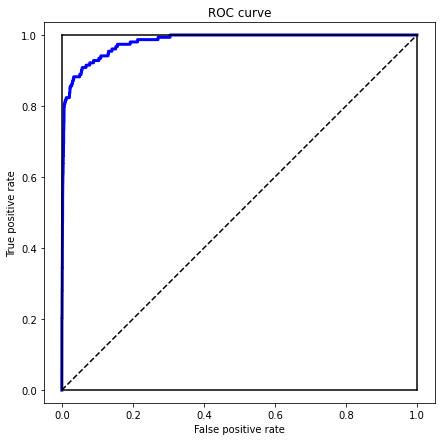

In [ ]:
gnb_p.fit(X_train, y_train)
y_pred_gnb_p = gnb_p.predict(X_test)
y_pred_proba_gnb_p = gnb_p.predict_proba(X_test)[:, 1]
print_metrics(y_test, y_pred_gnb_p, y_pred_proba_gnb_p)

*recall сильно уменьшился, а precision с f1 выросли, но такой байесовский классификатор конечно же не подходит для нашей задачи*

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

*Хотел взять датасет про депрессию, а тут небинарная классификация...*

*Как оказалось, половина датасетов на Каггле про вино, банковские операции и другие неоригинальные штуки. Но я нашел про игры*

[Kaggle](https://www.kaggle.com/datasets/imohtn/video-games-rating-by-esrb)

*Надо предсказать возрастной рейтинг игры*

In [ ]:
import gdown
url = "https://drive.google.com/uc?id=1TcGptrPtp4UzpQ96Rl88LVH9iSz9Uek8"
output = "Video_games_esrb_rating.csv"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1TcGptrPtp4UzpQ96Rl88LVH9iSz9Uek8
To: /content/Video_games_esrb_rating.csv
100%|██████████| 169k/169k [00:00<00:00, 28.2MB/s]


'Video_games_esrb_rating.csv'

In [ ]:
url2 = 'https://drive.google.com/uc?id=1TdwbSd6pI6CRbQ7qpk1xM7-be5vW_BGz'
output2 = 'test_esrb.csv'
gdown.download(url2, output2)

Downloading...
From: https://drive.google.com/uc?id=1TdwbSd6pI6CRbQ7qpk1xM7-be5vW_BGz
To: /content/test_esrb.csv
100%|██████████| 44.5k/44.5k [00:00<00:00, 10.9MB/s]


'test_esrb.csv'

In [ ]:
games1 = pd.read_csv('/content/Video_games_esrb_rating.csv')
games2 = pd.read_csv('/content/test_esrb.csv')

In [ ]:
games1

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [ ]:
games2

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,For Honor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
496,Victor Vran Overkill Edition,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
497,Danganronpa 1•2 Reload,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,M
498,Touhou Double Focus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


In [ ]:
games = pd.concat([games1, games2], axis=0)
games

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,For Honor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
496,Victor Vran Overkill Edition,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
497,Danganronpa 1•2 Reload,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,M
498,Touhou Double Focus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


In [ ]:
games.reset_index(inplace=True)
games.drop(columns='index', inplace=True)
games

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,For Honor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2391,Victor Vran Overkill Edition,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2392,Danganronpa 1•2 Reload,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,M
2393,Touhou Double Focus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


In [ ]:
games.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.00000,2395.000000,2395.000000
mean,0.479332,0.050522,0.008351,0.231315,0.127349,0.020042,0.051357,0.034238,0.230063,0.109395,...,0.022547,0.031315,0.047599,0.057620,0.104384,0.038831,0.108977,0.03048,0.022965,0.114823
std,0.499677,0.219065,0.091019,0.421762,0.333433,0.140172,0.220771,0.181878,0.420961,0.312199,...,0.148485,0.174205,0.212961,0.233072,0.305822,0.193232,0.311675,0.17194,0.149822,0.318874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2395 non-null   object
 1   console                   2395 non-null   int64 
 2   alcohol_reference         2395 non-null   int64 
 3   animated_blood            2395 non-null   int64 
 4   blood                     2395 non-null   int64 
 5   blood_and_gore            2395 non-null   int64 
 6   cartoon_violence          2395 non-null   int64 
 7   crude_humor               2395 non-null   int64 
 8   drug_reference            2395 non-null   int64 
 9   fantasy_violence          2395 non-null   int64 
 10  intense_violence          2395 non-null   int64 
 11  language                  2395 non-null   int64 
 12  lyrics                    2395 non-null   int64 
 13  mature_humor              2395 non-null   int64 
 14  mild_blood              

*Название и платформа не влияют на рейтинг, можем удалить их*

In [ ]:
games.drop(columns=['title', 'console'], inplace=True)
games

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,M
2391,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2392,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,M
2393,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,T


In [ ]:
X = games.drop(columns='esrb_rating')
y = games['esrb_rating']

In [ ]:
fig = px.histogram(y, x='esrb_rating')
fig.show()

*Распределение примерно равномерное, но категория T выделяется*

In [ ]:
rating = {"E": 0, "ET": 1, "T": 2, "M": 3}

In [ ]:
y = y.apply(lambda x: rating[x])
y

0       0
1       1
2       3
3       1
4       2
       ..
2390    3
2391    3
2392    3
2393    2
2394    2
Name: esrb_rating, Length: 2395, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2077)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
targets = ["E", "ET", "T", "M"]

In [ ]:
log_reg = LogisticRegression(max_iter=500)
knn = KNeighborsClassifier()
svm = SVC()
dtc = DecisionTreeClassifier()

**Logistic Regression**

In [ ]:
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_log, target_names=targets))

              precision    recall  f1-score   support

           E       0.90      0.99      0.94       149
          ET       0.82      0.79      0.80       183
           T       0.81      0.79      0.80       261
           M       0.86      0.84      0.85       126

    accuracy                           0.84       719
   macro avg       0.85      0.85      0.85       719
weighted avg       0.84      0.84      0.84       719



**KNN**

In [ ]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn, target_names=targets))

              precision    recall  f1-score   support

           E       0.81      0.99      0.89       149
          ET       0.76      0.77      0.76       183
           T       0.81      0.72      0.76       261
           M       0.88      0.83      0.86       126

    accuracy                           0.81       719
   macro avg       0.81      0.83      0.82       719
weighted avg       0.81      0.81      0.80       719



**Const**

In [ ]:
y_pred_const = np.ones(len(y_test)) * 2
print(classification_report(y_test, y_pred_const, target_names=targets, zero_division=True))

              precision    recall  f1-score   support

           E       1.00      0.00      0.00       149
          ET       1.00      0.00      0.00       183
           T       0.36      1.00      0.53       261
           M       1.00      0.00      0.00       126

    accuracy                           0.36       719
   macro avg       0.84      0.25      0.13       719
weighted avg       0.77      0.36      0.19       719



**SVM**

In [ ]:
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm, target_names=targets))

              precision    recall  f1-score   support

           E       0.94      0.99      0.96       149
          ET       0.82      0.84      0.83       183
           T       0.84      0.80      0.82       261
           M       0.87      0.87      0.87       126

    accuracy                           0.86       719
   macro avg       0.87      0.87      0.87       719
weighted avg       0.86      0.86      0.86       719



**DecisionTreeClassifier**

In [ ]:
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print(classification_report(y_test, y_pred_dtc, target_names=targets))

              precision    recall  f1-score   support

           E       0.92      0.97      0.94       149
          ET       0.79      0.85      0.82       183
           T       0.85      0.79      0.82       261
           M       0.87      0.87      0.87       126

    accuracy                           0.85       719
   macro avg       0.86      0.87      0.86       719
weighted avg       0.85      0.85      0.85       719



### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

*В качестве максимизируемой метрики использую accuracy, так как классы примерно равно распределены, а предпочтений никаких нет*

*Для логрега попробуем не использовать регуляризацию и изменять силу регуляризации (`C`)*

In [ ]:
C_labels = []
l_labels = []
scores = []
l_labels.append('none')
C_labels.append(1.0)
scores.append(cross_val_score(LogisticRegression(max_iter=500, penalty='none'), X, y, scoring='accuracy').mean())

for i in [1.0, 10.0, 100.0, 1000.0]:
    l_labels.append('l2')
    C_labels.append(i)
    scores.append(cross_val_score(LogisticRegression(max_iter=500, penalty='l2', C=i), X, y, scoring='accuracy').mean())
res = {
        'scores': scores,
        'penalty': l_labels,
        'C': C_labels
    }

print(res)
print(max(res['scores']))
fig = px.scatter(res, x='C', y='scores', color='penalty', title='LogReg', trendline='lowess', log_x=True)
fig.update_layout(yaxis_range=[0.5 ,1])
fig.show()


{'scores': [0.8459290187891441, 0.8384133611691024, 0.8484342379958246, 0.8467640918580376, 0.8455114822546973], 'penalty': ['none', 'l2', 'l2', 'l2', 'l2'], 'C': [1.0, 1.0, 10.0, 100.0, 1000.0]}
0.8484342379958246


*Для KNN переберем способы рассчета весов и количество соседей*

In [ ]:
weights_labels = []
nn_labels = []
scores = []
for i in ['uniform', 'distance']:
    for j in range(3, 16, 1):
        weights_labels.append(i)
        nn_labels.append(j)
        scores.append(cross_val_score(KNeighborsClassifier(n_neighbors=j, weights=i), X, y, scoring='accuracy').mean())

res = {
        'scores': scores,
        'weights': weights_labels,
        'n_neighbors': nn_labels
    }

print(res)
print(max(res['scores']))
fig = px.scatter(res, x='n_neighbors', y='scores', color='weights', title='KNN', trendline='lowess', trendline_options=dict(frac=0.1))
fig.update_layout(yaxis_range=[0.5, 1])
fig.show()

{'scores': [0.746972860125261, 0.8254697286012526, 0.8263048016701461, 0.8129436325678497, 0.8200417536534447, 0.8062630480167015, 0.8045929018789144, 0.8033402922755741, 0.8075156576200417, 0.8066805845511482, 0.8083507306889353, 0.8045929018789144, 0.8037578288100209, 0.7607515657620042, 0.8438413361169103, 0.8405010438413362, 0.8388308977035491, 0.8417536534446765, 0.8384133611691024, 0.8388308977035489, 0.8392484342379959, 0.8413361169102298, 0.8417536534446765, 0.8405010438413362, 0.8375782881002086, 0.8367432150313151], 'weights': ['uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance'], 'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
0.8438413361169103


*Для SVC перебор ядра для алгоритма и силы регуляризации*

In [ ]:
kernel_labels = []
C_labels = []
scores = []
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    for j in [1, 10, 100, 1000]:
        kernel_labels.append(i)
        C_labels.append(j)
        scores.append(cross_val_score(SVC(C=j, kernel=i), X, y, scoring='accuracy').mean())

res = {
        'scores': scores,
        'kernel': kernel_labels,
        'C': C_labels
    }

print(res)
print(max(res['scores']))
fig = px.scatter(res, x='C', y='scores', color='kernel', title='SVC', trendline='lowess', log_x=True)
fig.update_layout(yaxis_range=[0.7, 0.9])
fig.show()

{'scores': [0.844258872651357, 0.8379958246346554, 0.8405010438413362, 0.8405010438413362, 0.8434237995824635, 0.8521920668058456, 0.8526096033402923, 0.8513569937369521, 0.8626304801670146, 0.8605427974947808, 0.8605427974947808, 0.8605427974947808, 0.7536534446764092, 0.748643006263048, 0.7578288100208768, 0.7607515657620041], 'kernel': ['linear', 'linear', 'linear', 'linear', 'poly', 'poly', 'poly', 'poly', 'rbf', 'rbf', 'rbf', 'rbf', 'sigmoid', 'sigmoid', 'sigmoid', 'sigmoid'], 'C': [1, 10, 100, 1000, 1, 10, 100, 1000, 1, 10, 100, 1000, 1, 10, 100, 1000]}
0.8626304801670146


*Для DTC критерии измерения качества разделения дерева и минимальное количетсво сэмплов для разделения*

In [ ]:
criterion_labels = []
min_samples_labels = []
scores = []
for i in ['gini', 'entropy']:
    for j in range(2, 40, 2):
        criterion_labels.append(i)
        min_samples_labels.append(j)
        scores.append(cross_val_score(DecisionTreeClassifier(min_samples_split=j, criterion=i), X, y, scoring='accuracy').mean())

res = {
        'scores': scores,
        'criterion': criterion_labels,
        'min_samples': min_samples_labels
    }

print(res)
print(max(res['scores']))
fig = px.scatter(res, x='min_samples', y='scores', color='criterion', title='DTC', trendline='lowess', trendline_options=dict(frac=0.1))
fig.update_layout(yaxis_range=[0.82, 0.86])
fig.show()

{'scores': [0.8446764091858038, 0.8396659707724424, 0.8434237995824635, 0.8413361169102297, 0.844258872651357, 0.844258872651357, 0.8450939457202505, 0.8446764091858038, 0.8450939457202505, 0.8417536534446765, 0.8413361169102297, 0.8409185803757829, 0.8396659707724426, 0.8363256784968683, 0.833402922755741, 0.8325678496868475, 0.8342379958246345, 0.8371607515657619, 0.8359081419624218, 0.849686847599165, 0.8463465553235908, 0.8492693110647181, 0.848016701461378, 0.848016701461378, 0.848016701461378, 0.8526096033402922, 0.8492693110647181, 0.8501043841336117, 0.8471816283924845, 0.848016701461378, 0.8475991649269311, 0.8467640918580376, 0.8434237995824635, 0.8421711899791232, 0.8400835073068894, 0.8396659707724426, 0.8405010438413363, 0.8400835073068894], 'criterion': ['gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'entropy', 'entropy', 'entropy', 'entropy', 'entropy', 'entropy', 'en

Из всех испытанных моделей наилучший результат показала SVC с параметрами `kernel='rbf', C=1`. Скор на кросс-валидации по accuracy составил 0.863. Подбор гиперапараметров не помог улчшить результат для SVC, но другие модели могут быть улучшены таким путем.

Извините за просрок, не снимайте баллы, пж...